In [1]:
from scipy.stats import shapiro
from scipy import stats
import scipy
import pandas as pd
import numpy as np

ds_camshaft = pd.read_csv("./Data/1. 통계이해/camshaft.csv")
ds_camshaft.head()

data1 = ds_camshaft['Supp1']
shapiro(data1)

(0.9788156747817993, 0.10744144767522812)

In [17]:
df = pd.read_csv('./Data/1. 통계이해/2sample_t_test.csv')
df = df.dropna()

shapiro(df['Mat_A'])

(0.9062636494636536, 0.2562994360923767)

In [18]:
shapiro(df['Mat_B'])

(0.9729753732681274, 0.9169777035713196)

In [19]:
df = pd.DataFrame({'smaple': [3.6, 2.9, 2.8, 2.6, 3.4, 3.2, 2.2, 2.6, 2.6, 2.4, 2.4, 2.6, 3.4, 2.4, 2.1, 2.6, 3.0, 2.4, 2.7, 2.4, 2.6, 2.9, 2.9, 2.0, 2.7, 2.2, 2.8, 2.7, 1.8, 2.5, 3.0, 3.2, 2.8, 2.6, 3.2, 3.1, 2.9, 2.7, 2.7, 2.2]})
df.head()

lower, upper = stats.norm.interval(0.95, loc=np.mean(df), scale=0.397/np.sqrt(40))
print('신뢰구간: ({0}, {1})'.format(lower.round(2), upper.round(2)))

신뢰구간: ([2.57], [2.82])


In [20]:
df = pd.DataFrame({'sample': [54.1, 53.3, 56.1, 55.7, 54.0, 54.1, 54.5, 57.1, 55.2, 53.8, 54.1, 54.1, 56.1, 55.0, 55.9, 56.0, 54.9, 54.3, 53.9, 55.0]})

lower, upper = stats.t.interval(0.95, len(df) - 1, loc=np.mean(df), scale=scipy.stats.sem(df))
print('신뢰구간: ({0}, {1}'.format(lower.round(2), upper.round(2)))

신뢰구간: ([54.39], [55.33]


In [28]:
df = pd.DataFrame({'sample': [74.5, 81.2, 73.8, 82.0, 76.3, 75.7, 80.2, 72.6, 77.9, 82.8]})
shapiro(df)

(0.9331598281860352, 0.4796823561191559)

In [30]:
t_result = stats.ttest_1samp(df,76.7)
t_result

Ttest_1sampResult(statistic=array([0.86437028]), pvalue=array([0.40983028]))

In [25]:
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

print('1-Sample t-test')
print('t 통계량: {}'.format(t))
print('p-value: {}'.format(p))

1-Sample t-test
t 통계량: [0.864]
p-value: [0.41]


In [35]:
df1 = pd.DataFrame({'sample':[6,5,5,4,6,7,6,4,5,6,4,5,5,6,4,8,6,5,6,7]})
df2 = pd.DataFrame({'sample':[7,5,7,8,7,8,8,5,7,6,5,5,6,6,5,7,9,7,7,8]})

shapiro(df1)

(0.9094840288162231, 0.06230909377336502)

In [36]:
shapiro(df2)

(0.8978105783462524, 0.03752673789858818)

In [37]:
stats.levene(df1['sample'], df2['sample'])

LeveneResult(statistic=0.04810126582278468, pvalue=0.8275746090758196)

In [45]:
t_result = stats.ttest_ind(df1, df2, equal_var=True)

t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

print('2-sample t-test')
print('t: {}'.format(t))
print('p: {}'.format(p))

2-sample t-test
t: [-3.122]
p: [0.003]


In [48]:
df1 = pd.DataFrame({'before':[720,589,780,648,720,589,780,648,780,648]})
df2 = pd.DataFrame({'after':[810,670,790,712,810,670,790,712,790,712]})

t_result = stats.ttest_rel(df1, df2)

t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

print('Paired t-test')
print('t: {}'.format(t))
print('p: {}'.format(p))

Paired t-test
t: [-5.324]
p: [0.]


In [51]:
from statsmodels.stats.proportion import proportions_ztest

count = 15
n_obs = 100
value = 0.1

stat, pval = proportions_ztest(count, n_obs, value)

In [52]:
print('1 Proportion test')
print('z: {0:0.3f}'.format(stat))
print('p: {0:0.3f}'.format(pval))

1 Proportion test
z: 1.400
p: 0.161


In [53]:
from statsmodels.stats.proportion import proportions_ztest

count = 150
n_obs = 1000
value = 0.1

stat, pval = proportions_ztest(count, n_obs, value)

In [54]:
print('1 Proportion test')
print('z: {0:0.3f}'.format(stat))
print('p: {0:0.3f}'.format(pval))

1 Proportion test
z: 4.428
p: 0.000


In [55]:
count = np.array([4,1])
nobs = np.array([1000, 1200])

stat, pval = proportions_ztest(count,nobs)

In [56]:
print('2 Proportion test')
print('z: {0:0.3f}'.format(stat))
print('p: {0:0.3f}'.format(pval))

2 Proportion test
z: 1.553
p: 0.120


In [59]:
df = pd.DataFrame({'HSG':[270,260,236,234], 'SS':[228,285,225,262], 'SPA':[277,284,231,208]})

chi, pval, dof, expected = stats.chi2_contingency(df.T)

print('chi-square test')
print('chisq: {0:0.3f}'.format(chi))
print('p: {0:0.3f}'.format(pval))
print('degree of freedom: {}'.format(dof))
print('expected value:\n{}'.format(expected.round(3)))

chi-square test
chisq: 13.366
p: 0.038
degree of freedom: 6
expected value:
[[258.333 276.333 230.667 234.667]
 [258.333 276.333 230.667 234.667]
 [258.333 276.333 230.667 234.667]]


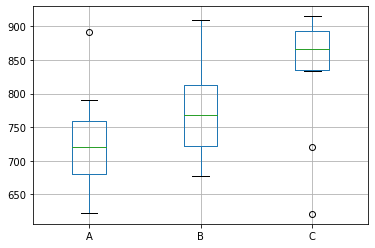

In [60]:
df = pd.DataFrame({'A':[892,623,721,678,723,790,720,670,690,771],
                  'B':[721,821,910,678,723,790,711,790,745,891],
                  'C':[621,915,888,721,894,834,841,912,845,889]})

df.boxplot(['A', 'B', 'C'])

In [61]:
f_result = stats.f_oneway(df['A'], df['B'], df['C'])

f, p = f_result.statistic.round(3), f_result.pvalue.round(3)

print('One-way')
print('F 통계량: {}'.format(f))
print('p-value: {}'.format(p))

One-way
F 통계량: 4.263
p-value: 0.025


In [63]:
df1 = [1,2,3,4,4,5,6,6,7,8]
df2 = [23,29,49,64,74,87,96,97,109,119]

corr, pval = stats.pearsonr(df1, df2)

print('Correlation Analysis')
print('corr: {0:0.3f}'.format(corr))
print('p-value: {0:0.3f}'.format(pval))

Correlation Analysis
corr: 0.989
p-value: 0.000


In [66]:
import statsmodels.api as sm
minutes = [1,2,3,4,4,5,6,6,7,8]
units = [23,29,49,64,74,87,96,97,109,119]

minutes = sm.add_constant(minutes)
model = sm.OLS(units, minutes)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     365.3
Date:                Tue, 30 Jun 2020   Prob (F-statistic):           5.82e-08
Time:                        17:50:46   Log-Likelihood:                -29.401
No. Observations:                  10   AIC:                             62.80
Df Residuals:                       8   BIC:                             63.41
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.1712      3.886      1.845      0.1

/home/piai/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


In [1]:
2.869/6

0.4781666666666667